# A Brief Introduction to Machine Learning

## Data Analytics and Machine Intelligence

### Testing a Simple Hypothesis

With all the different titles, the core of our business is to extract information from data. Arguably, the simplest form of "a piece of information" is to answer a yes/no question. Let us start from a basic and classic method of extracting such kind of information from data: 

> Should I accept or reject a hypothesis about the data.

To be concrete, let's get our old friend iris flowers as sample data.

__Load Data__

In [1]:
# Get some data
from sklearn.datasets import load_iris
iris_db = load_iris()
print("Attributes: ", iris_db.feature_names)
print("Targets: ", iris_db.target_names)
example_id = 0
X = iris_db.data   # the attributes / independent variables
y = iris_db.target # the prediction target / response
print("Sample ", example_id)
print("    X-observation:", X[example_id])
print("    y:", y[example_id], iris_db.target_names[y[example_id]])

Attributes:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']
Sample  0
    X-observation: [5.1 3.5 1.4 0.2]
    y: 0 setosa


<span style="color:blue">__Practice__</span>
- How many flowers in the data?
- Given one flower, what are the independent variables and what is the target/label?
- Try to frame the lable-prediction problem in Yes/No questions.
    - Remove the class "virginica" (class-label==2), from the dataset. Then frame the new problem as yes/no questions.

__Visualise the Data__

In [3]:
# prepare the canvas
%matplotlib inline
import matplotlib.pyplot as plt

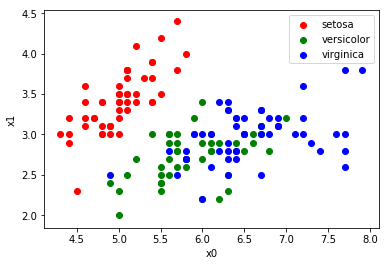

In [11]:
# scatter plot the data samples as a point on the X0-X1 plane
# using 3 colours for samples belonging to the 3 classes.
plt.scatter(X[y==0, 0], X[y==0, 1], c='red')
plt.scatter(X[y==1, 0], X[y==1, 1], c='green')
plt.scatter(X[y==2, 0], X[y==2, 1], c='blue')
# setup auxiliary information in the graph
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend(iris_db.target_names)
plt.show()

<span style="color:blue">__Practice__</span>
- Draw the data w.r.t. X1-X2.
- Draw the data w.r.t. all possible 2-variable combination.
- Try to compute the mean value of the variable-pair for all classes
- Remove class "virginica" and draw the data using X0, X1.

<span style="color:blue">__Discussion__</span>
- Come up with a plan to classify between class "setosa" and "versicolor".
- Evaluate your plan using some criterion on the data.
    - Justify the criterion you had chosen.
    - <span style="color:blue">__Practice__</span>: implement your criterion.
- Based on what we had learned in the last semester, could you identify any issue of the procedure above?
- How to address the issue? Come up with a plan and implement your plan.

### Select a good hypothesis

In [37]:
import random
def generate_h(attr_num, low_vals, high_vals):
    j = random.randint(0, attr_num - 1)
    th = random.random() * (high_vals[j] - low_vals[j]) \
        + low_vals[j]
    direction = random.randint(0, 1)
    return j, th, direction

def h_fit(X, y, h_num):
    N = X.shape[0]
    best_accuracy = 0
    best_h = None
    for i in range(h_num):
        
        (j, th, direction) = generate_h(4, X.min(axis=0), X.max(axis=0))
        
        if direction == 1: # direction
            a = ((X[:, j] > th) == y).sum()
        else:
            a = ((X[:, j] <= th) == y).sum()
        if a > best_accuracy:
            best_accuracy = a
            best_h = (j, th, direction)
    return best_h

In [42]:
# Take only the first 2 classes
X2c = X[y!=2, :]
y2c = y[y!=2]
h_fit(X2c, y2c, 10)

(0, 5.15740236111902, 1)

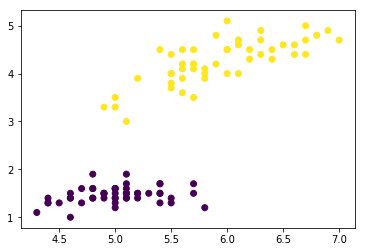

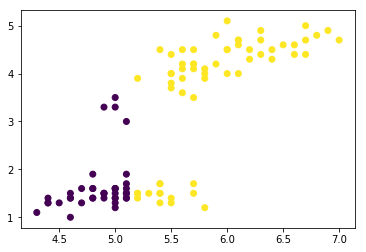

In [56]:
# Show the classification results
plt.scatter(X2c[:, 0], X2c[:, 2], c=y2c)
plt.show()
index = X2c[:, 0] > 5.16
plt.scatter(X2c[:, 0], X2c[:, 2], c=index)

## Framework of learning

A typical learning procedure is as follows

```python
while more_to_learn:
    data, annotation = data_feeder.next()
    prediction = model.processor(data)
    loss = model.evaluation_criterion(prediction, annotation)
    model.optimiser(loss)
```

This is different from a conventional data analyst's view point!

We can recognise the following key components: Data (`data_feeder`), Processor (`model.processor`), Evaluation criterion (`model.evaluation_criterion`), Optimiser (`model.optimiser`). 

The interaction between those elements in a learning process is explained by the following diagram.
<img src="ref/illu1.png" width="400px"/>

The essential four:

(1) `data_feeder` will provide two pieces of information about a set of data instances during learning. Let's call them $X$ and $Y$-variables, respectively. $X$-variables can be seen as the information based on which we build the predictor, $Y$-variables are the target of prediction.  $X$-variables also known as _independent variables_, _predictors_ in literature, and $Y$-variables _dependent variables_, _response_. The essential distinction is that
> $X$-variables represent the part of information in the task that is always observable, even after the learning (training) and the model has been deployed; while the $Y$-variables are only available to us during learning. In test time, they are unknown and target of prediction.

Then you may notice the processor, evaluation criterion and the optimiser are grouped in the `model` object. This is to emphasise the fact that these parts are under our control, and reflects our ASSUMPTION on how the world works: 
i) how $X$ variables are related to the $Y$ (`model.predictor`), in a _learnable_ way (see (iii) below);
ii) what makes a good model (`model.evaluation_criterion`, defining the performance gauge); and
iii) how can we modify the predictor in (i) w.r.t. observed training ($X$, $Y$) pairs to improve the performance measured by (ii).


(2) `predictor` describes how $X$ variables are related to the $Y$ variables. The predictor represents the "data model" in a more specific sense. When dealing with any particular task, we need to clarify the notion of "data model", though.

In the early stage of solving a problem, I often find it is more convenient to adopt the principle of "duck-typing" to the notion of "data model" than to forge an explicit definition. We start by considering what a model can do, i.e. the typical application of a model. Assume for a while some black box data model is prepared by oracle. Then what the input and output of the black box? Typically, a model that can
- accept instances of $X$-variables and output the corresponding $Y$-variables
    - there are variants of data models in this category -- deterministic models (often closely linked to the notion "greedy" in literature) and stochastic models.
- accept $(X, Y)$ pairs and output how likely such a combination appears.
    - [Q]: Can you imagine, given such a model, how we can re-formulate such a model so to get $Y$ for given $X$?

(3) `loss` measures, **in the training stage**, how well the predictor's outputs match what are desired (annotations). 

Note the loss is NOT necessarily consistent with what really matters -- which is dictated by the specific data analysis scenarios.

Please distinguish the following two risks of using a learned data model: 
- i) The mis-alignment between the loss and the actual criteria -- what is discussed above.
- ii) The generalisation risk, the discrepancy between the model performance on training and test data, both measured by the same `loss` function -- we had learned previously in introduction to DA, and you heard more often.

We will talk both in greater depth later in this course.

(4) `optimiser` adjusts the `predictor` -- which is always designed in an adjustable way, so its performance -- measured by `loss` over the instances given by `data_feeder` (make sure to keep in mind these qualifications) -- reaches optimum. This mostly represents the algorithmically actionable learning steps, i.e. the heavy-lifting operations to produce an optimal predictor, which is the final output of the learning process, often considered the selected one ($h$) from a "hypothesis set" $\mathcal H$ in more theoretical works in literature.

The optimiser models the solver of the problem: given the data, the loss and the formulation of the predictors, find the optimal predictor. In almost all paractical problems, the true optimum is beyond our reach: 
- it may not exist, for function as simple as $f(x) = x$
$$
\max_{x \in [0, 1)} f(x)
$$
doesn't have a solution.
- there maybe duplicate (lots of) optima, 
$$
\max_{x_1, x_2, \dots, x_{10} \in \{0, 1\}} f(x_1, \dots, x_{10}) \\
f(x_1, \dots, x_{10}) := \sum_{i,j = 1..10} |x_i - x_j|
$$

In practice, the optimiser is often formulated in such a way:
- __descriptive__: at this point, I cannot get the predictor any better w.r.t. the criterion, often called _local_ optimum
- __imperative__: consider the local optimality as actionable step, the strategy often works (but not guaranteed always) -- then we have described a _fixed point_ in the space consisting of all predictor model parameters.


I will provide data modelling examples, and we will

- Discussion-1: identify the data_feeder, the predictor, the loss and the optimiser in the following example.

<img src="ref/illu-knime.png" width="400px"/>

- Discussion-2: identify the X-Y variables in the data.

- Discussion-3: an example of predictor (not necessarily a good-behaving one).

- Discussion-4: Do you think decision trees in MNIST a good model, yes/no/why?

In [ ]:
# We will playing with the following example for a while
# Let me first give it in a whole block

# prepare libraries
from sklearn.datasets import load_iris
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import MNIST

# Formal handling of our data
class TensorIrisDataset(Dataset):
    def __init__(self, iris_data): # class constructor
        super(TensorIrisDataset, self).__init__()
        self.data = torch.Tensor(iris_data.data)
        self.target = torch.LongTensor(iris_data.target)
        
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, ind):
        return self.data[ind], self.target[ind]
        

d_trn, d_tst = random_split(d, [100, 50])        


In [ ]:
d  = TensorIrisDataset(load_iris())
p = DataLoader(dataset=d_trn, batch_size=4)
for x, y in p:
    break
print(x,y)

In [ ]:
# In the next lecture, we will review a few data models: 
# 1. perceptron
# 2. neural network
# 3. decision tr
# on iris data. (optionally on MNIST data as well)

# Summarise

## Take-home points
- Four elements: PLO.D
- Two groups of variables, availability in different stages.
- What a data model does? Or what specific structure we had assumed about the world and how to put it into use.
- Risks (three strikes!)
    - Training-test generalisation error (main)
    - Inconsistent criterion
    - Local optimality
    
## Programming skills
- setting up `colab`
- import libraries torch/sklearn
- learning loop -- why looping here?
- 5-th element: logging!
- `class` vs instances: *description* and realisation

## Further reading
- Fixed point theorem
- Why learning works (a short course ...)
- Occums' razor
- Fallibility